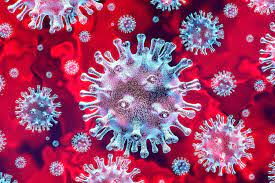

# About Covid-19
#### As we all know  our country is still facing SARS-CoV-2 (n-coronavirus),the scenes of suffering in our country are hard to comprehend .As of 12 June 2021, India has the second-highest number of confirmed cases in the world (after the United States) with 29.3 million reported cases of COVID-19 infection and the third-highest number of COVID-19 deaths (after the United States and Brazil) at 367,081 deaths.A second wave beginning in March 2021 was much larger than the first, with shortages of vaccines, hospital beds, oxygen cylinders and other medicines in parts of the country. By late April, India led the world in new and active cases. On 30 April 2021, it became the first country to report over 400,000 new cases in a 24-hour period.Health experts believe that India's figures have been underreported due to several factors.
####  This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time. In this notebook, the main focus is to analyze the spread trend of this virus all over the india.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [ ]:
state_df = pd.read_csv('../input/covid19-in-india/StatewiseTestingDetails.csv')
country_df = pd.read_csv('../input/covid19-in-india/covid_19_india.csv')

In [ ]:
country_df.head(10)

In [ ]:
country_df.isnull().sum() # no null values are present

In [ ]:
country_df = country_df.drop(['Sno','ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1)
country_df.head()
# deleting sno , ConfirmedIndianNational,ConfirmedForeignNational

In [ ]:
country_df['Active'] = country_df['Confirmed'] - country_df['Cured'] - country_df['Deaths']
country_df.tail() 
# calculating active cases in our country

In [ ]:
country_df['Date'] = pd.to_datetime(country_df['Date'])
#convert to date and time format

In [ ]:
country_df.head()

In [ ]:
fig=plt.figure(figsize=(15,8))
ax=sns.lineplot(data=country_df[country_df['State/UnionTerritory'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra','Uttar Pradesh','Karnataka'])],x='Date',y='Active',hue='State/UnionTerritory')
ax.set_title("Active cases by States", size=20)
plt.show()
# Active cases in top 6 states during the period of time

In [ ]:
india_cases = country_df[country_df['Date'] == country_df['Date'].max()].copy().fillna(0)
india_cases.index = india_cases["State/UnionTerritory"]
india_cases = india_cases.drop(['State/UnionTerritory','Date'], axis=1)

In [ ]:
india_cases.head()

In [ ]:
top_10_death_states = india_cases.sort_values('Deaths',ascending = False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of death", size=20)
plt.xlabel("states")
plt.ylabel("Number of deaths in thousands")
ax=sns.barplot(data=top_10_death_states.iloc[:10],y=top_10_death_states.Deaths,x=top_10_death_states.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of deaths')
plt.show()

In [ ]:
top_10_cured_cases = india_cases.sort_values('Cured',ascending = False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of cured cases", size=20)
plt.xlabel("states")
plt.ylabel("Number of cured cases")
ax=sns.barplot(data=top_10_cured_cases.iloc[:10],y=top_10_cured_cases.Cured,x=top_10_cured_cases.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of confirmed cases')
plt.show()

In [ ]:
vaccination = pd.read_csv(r"../input/covid19-in-india/covid_vaccine_statewise.csv")

In [ ]:
vaccination.head(20)

In [ ]:
vaccination.shape

In [ ]:
vaccination.isnull().sum()

In [ ]:
vaccination = vaccination.drop(['Total Sputnik V Administered','AEFI', '18-45 years (Age)','45-60 years (Age)','60+ years (Age)'], axis=1)
# removing columns having most null values

In [ ]:
vaccination.head()

In [ ]:
male = vaccination["Male(Individuals Vaccinated)"].sum() 
female = vaccination["Female(Individuals Vaccinated)"].sum()  
trans = vaccination["Transgender(Individuals Vaccinated)"].sum()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19")

In [ ]:
Covaxin = vaccination["Total Covaxin Administered"].sum() 
Covishield = vaccination["Total CoviShield Administered"].sum()  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxin,Covishield],title="Covaxin and Covishield Vaccination")

In [ ]:
v=vaccination[vaccination.State!='India']
print(v.index)

In [ ]:
v.head(5)

In [ ]:
v.rename(columns = {"Total Individuals Vaccinated": "Total"}, 
          inplace = True)

In [ ]:
States_grouped=v.groupby('State')['Total'].sum().to_frame('Total')
States_grouped=States_grouped.sort_values('Total',ascending=False).head(5)
States_grouped

In [ ]:
fig=plt.figure(figsize=(8,6))
plt.title("Top 5 Vaccinated states", size=20)
plt.xlabel("states")
plt.ylabel("Vaccination number")
x=sns.barplot(data=States_grouped.iloc[:10],y=States_grouped.Total,x=States_grouped.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of confirmed cases')
plt.show()

In [ ]:
Doses = vaccination["Total Doses Administered"].sum() 
Vaccinated = vaccination["Total Individuals Vaccinated"].sum()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [ ]:
df_Karnataka=vaccination[vaccination['State']=='Karnataka']

In [ ]:
Doses = df_Karnataka["Total Doses Administered"].sum() 
Vaccinated = df_Karnataka["Total Individuals Vaccinated"].sum()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

# THANK YOU